# Analiza Lego setov
Za projektno nalogo pri predmetu Programiranje 1 analiziram Lego sete med leti 1990 in 2021.
Odgovoriti želim na naslednja vprašanja:
- Ali povprečno število kock skozi leta narašča? Kaj pa minifigur?
- Ali cena Lego kock skozi leta narašča?
- Kako starost vpliva na vrednost seta?
- Ali se skozi leta pojavlja več ekskluzivnih minifigur? To definiramo kot minifigure, ki se pojavijo samo v enem setu.
- Ali lahko iz imena minifigure sklepamo iz katere teme prihaja?

## Nalaganje podatkov

Naložimo potrebne podatke:

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None 

In [2]:
seti = pd.read_csv("obdelani-podatki\seti.csv", index_col="stevilka").drop_duplicates()
minifigure = pd.read_csv("obdelani-podatki\minifigure.csv", index_col="id").drop_duplicates()
minifigure_v_setih = pd.read_csv("obdelani-podatki\minifigure_v_setih.csv", index_col="id")


In [3]:
seti

,ime,tema,podtema,leto,st_kock,st_minifigur,dostopnost,msrp,vrednost
stevilka,,,,,,,,,
22.3,Value Pack Italy,Promotional,Value Packs,1995,91,0,Retired,21.55,82.55
23.2,Value Pack Italy,Town,Value Packs,1995,161,0,Retired,13.17,274.37
54.0,UFO Action Pack,Space,UFO,1997,96,0,Retired,7.03,113.42
100.0,Stores Minifigure,Promotional,LEGO Brand Stores,2019,1,1,Retired,NaN,48.26
315.0,Basic Building Set,Basic,NaN,1990,62,0,Retired,NaN,9.29
...,...,...,...,...,...,...,...,...,...
8785476.0,Sea,Exclusive,Muji,2011,91,0,Retired,24.20,62.14
8785483.0,Circus,Exclusive,Muji,2011,91,0,Retired,24.20,72.61
8785490.0,Animals,Exclusive,Muji,2011,127,0,Retired,24.20,38.68


In [4]:
minifigure

,ime,tema,podtema,leto,st_setov,novo,rabljeno
id,,,,,,,
1463,"Duplo Figure Dora the Explorer, Boots The Monkey",DUPLO,Dora the Explorer,2004,1,6.09,9.44
2327pb01,"Duplo 2 x 2 x 2 Figure Brick, Blue Base, Strip...",DUPLO,Basic Set,1994,11,0.50,0.19
2327pb03,"Duplo 2 x 2 x 2 Figure Brick, Blue Base with Y...",DUPLO,Basic Set,1994,7,NaN,0.16
2327pb04,"Duplo 2 x 2 x 2 Figure Brick, Blue Base with S...",DUPLO,Basic Set,1991,3,2.28,0.23
2327pb05,"Duplo 2 x 2 x 2 Figure Brick, Blue Base with S...",DUPLO,Basic Set,1991,8,NaN,0.20
...,...,...,...,...,...,...,...
zip034,"Jacket with Zipper - White, White Legs, Red Fe...",Town,Classic Town,1993,1,NaN,0.72
zip035,"Jacket with Zipper - White, Green Legs, Black ...",Town,Classic Town,1993,1,2.13,1.29
zip036,"Jacket with Zipper - White, Green Legs, Black ...",Town,Classic Town,1993,1,NaN,1.24


## Povprečno število kock in minifigur

Oglejmo si spreminjanje števila kock in minifigur v setih skozi leta:

<AxesSubplot: xlabel='leto'>

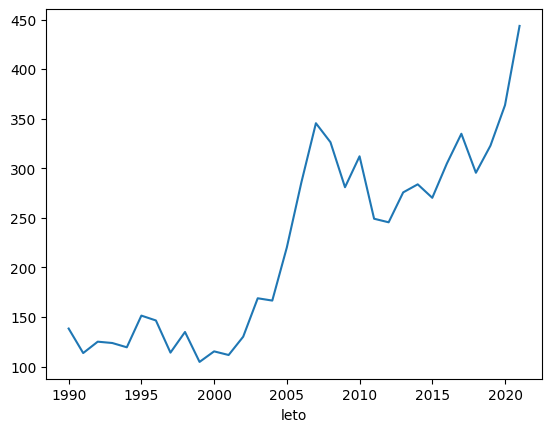

In [5]:
seti.groupby("leto").st_kock.mean().plot()

Vidimo lahko, da je v 21. stoletju število kock v setih naraslo, nato je nekaj časa stagniralo, v zadnjih letih pa ponovno narašča.

<AxesSubplot: xlabel='leto'>

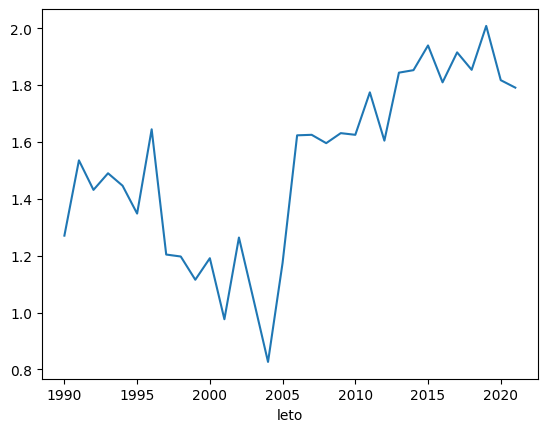

In [6]:
seti.groupby("leto").st_minifigur.mean().plot()

Število minifigur je v setih upadalo do leta 2004, od takrat pa je naraslo in se ustalilo.

<AxesSubplot: xlabel='leto'>

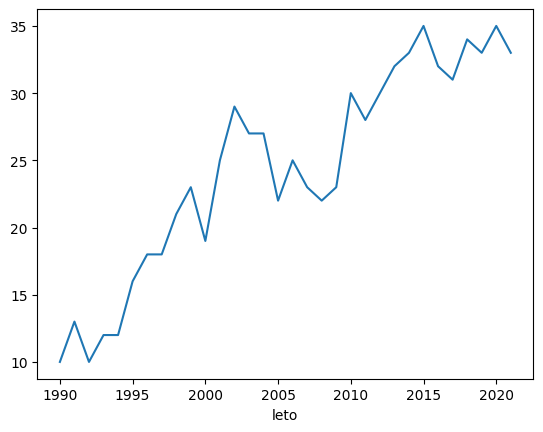

In [7]:
seti_po_temah = seti.groupby(["leto","tema"]).mean(numeric_only=True)
seti_po_temah.groupby("leto").size().plot()


Za zaključek si oglejmo še število tem skozi leta. Število konstantno narašča zadnjih 30 let.

## Cena Lego setov

Analizirajmo ceno Lego setov skozi leta:

<AxesSubplot: xlabel='leto'>

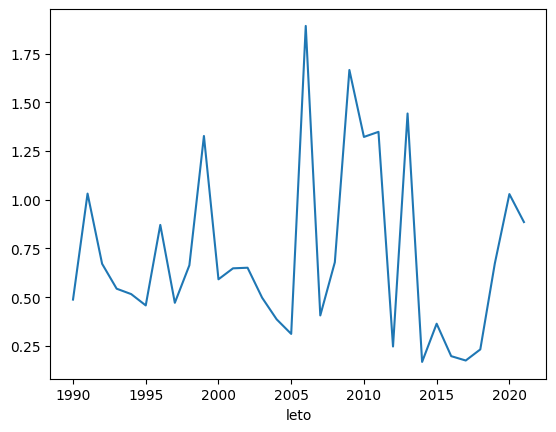

In [8]:
seti_s_cenami = seti[seti.msrp > 0]
seti_s_cenami["cena_na_kocko"] = seti_s_cenami.msrp / seti_s_cenami.st_kock
seti_s_cenami.groupby("leto").cena_na_kocko.mean().plot()


Prvi graf prikazuje povprečno ceno na kocko skozi leta. Proti pričakovanjem je ta številka zelo volatilna, vidimo pa, da je na dolgi rok prodajna cena Lego kock dokaj stabilna.

<AxesSubplot: xlabel='leto'>

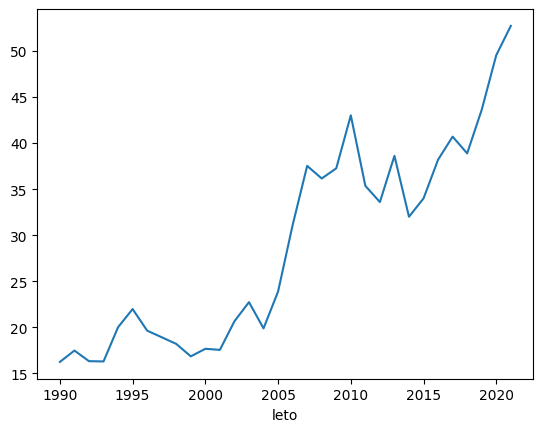

In [9]:
seti_s_cenami.groupby("leto").msrp.mean().plot()

Drugačno sliko kaže graf povprečne cene setov skozi leta. Ta graf pa ne upošteva dejstva, da imajo skozi leta seti tudi več kock, zato narašča tudi povprečna cena.

<AxesSubplot: xlabel='st_minifigur'>

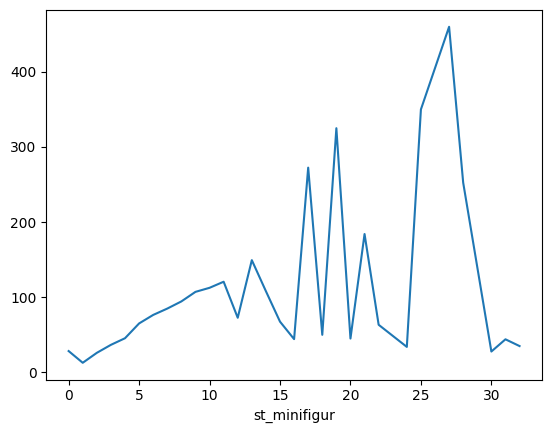

In [10]:
seti_s_cenami.groupby("st_minifigur").msrp.mean().plot(x="st_minifigur", y="msrp")

Število minifigur ima vpliv na prodajno ceno seta. Cena konstantno raste do 11 minifigur v setu, nato se pojavi več volatilnosti. Seti z nižjo ceno in več minifigurami so zelo verjetno seti, ki so namenjeni zbiranju minifigur in ne vsebujejo veliko drugih kock.

In [11]:
seti_s_cenami[["ime", "tema", "leto", "st_kock", "st_minifigur", "msrp", "cena_na_kocko"]].sort_values("msrp", ascending=False).head(20)

,ime,tema,leto,st_kock,st_minifigur,msrp,cena_na_kocko
stevilka,,,,,,,
75192.0,Millennium Falcon,Star Wars,2017,7541,8,849.99,0.112716
75313.0,AT-AT,Star Wars,2021,6785,9,849.99,0.125275
2000415.0,Identity and Landscape Kit,Serious Play,2010,2808,0,699.99,0.249284
75252.0,Imperial Star Destroyer,Star Wars,2019,4784,2,699.99,0.146319
10294.0,Titanic,Icons,2021,9090,0,679.99,0.074806
2000431.0,Connections Kit,Serious Play,2013,2455,0,559.99,0.228102
2000413.0,Connections Kit,Serious Play,2010,2455,0,559.99,0.228102
5005217.0,Death Star Ultimate Kit,Star Wars,2016,4740,0,549.99,0.116032
10276.0,Colosseum,Icons,2020,9036,0,549.99,0.060867


Seznam najdražjih setov po originalni ceni.

<AxesSubplot: xlabel='leto'>

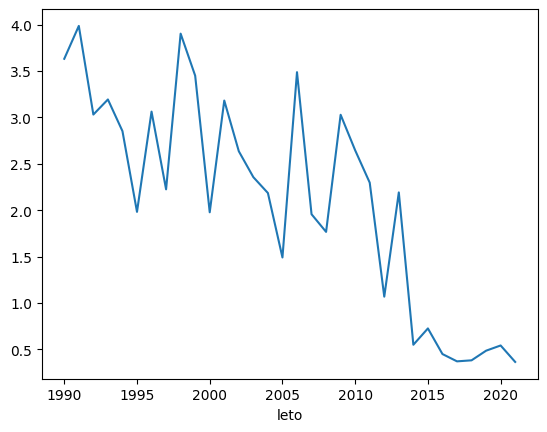

In [12]:
seti_z_vrednostmi = seti[seti.vrednost > 0]
seti_z_vrednostmi["cena_na_kocko"] = seti_z_vrednostmi.vrednost / seti_z_vrednostmi.st_kock
seti_z_vrednostmi.groupby("leto").cena_na_kocko.mean().plot()

V primerjavi s prodajnimi cenami, je pri trenutni vrednosti setov opazen trend, da so starejši seti dražji od novejših.

<AxesSubplot: xlabel='leto'>

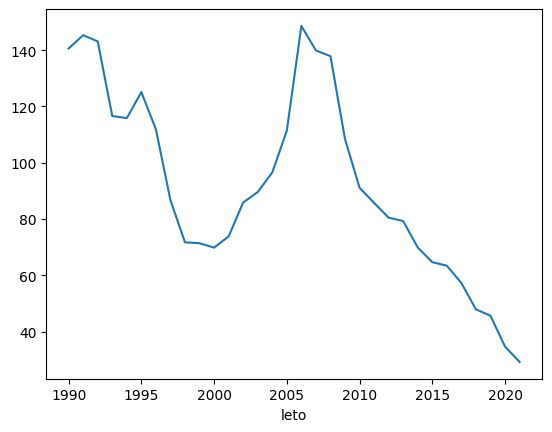

In [13]:
seti_z_vrednostmi.groupby("leto").vrednost.mean().plot()

Gledano kot povprečna vrednost celotnih setov, se pojavi nepričakovana rast cen med 2000 in 2010.

In [14]:
seti_z_vrednostmi.sort_values("vrednost", ascending=False).head(10)

,ime,tema,podtema,leto,st_kock,st_minifigur,dostopnost,msrp,vrednost,cena_na_kocko
stevilka,,,,,,,,,,
7153.0,Jango Fett's Slave I,Star Wars,Episode II,2002,360,2,Retired,43.99,996.60,2.768333
19710.0,Sears Tower,Architecture,Brickstructures,2008,68,0,Retired,26.39,970.96,14.278824
2008.0,Heart,Exclusive,Employee Gift,2008,92,0,Retired,NaN,967.34,10.514565
10175.0,Vader's TIE Advanced,Star Wars,Ultimate Collector Series,2006,1212,0,Retired,87.99,967.11,0.797946
3723.0,LEGO Mini-Figure,Advanced Models,Sculptures,2000,1849,0,Retired,123.19,963.32,0.520995
5590.0,Whirl and Wheel Super Truck,Model Team,NaN,1990,1063,0,Retired,70.39,957.86,0.901091
8868.0,Air Tech Claw Rig,Technic,NaN,1992,954,0,Retired,122.32,953.95,0.999948
41491.0,San Diego Comic-Con Batman & The Joker,BrickHeadz,DC Comics Super Heroes,2016,212,0,Retired,39.99,948.54,4.474245
10001.0,Metroliner Legend,Trains,9V,2001,782,11,Retired,131.99,928.60,1.187468


Tu je še seznam najdražjih setov. Redki in zaželjeni seti pridobivajo vrednost ne glede na število kock ali minifigur.

In [15]:
seti_z_vrednostmi[seti_z_vrednostmi.leto == 2006].sort_values("vrednost", ascending=False).head(10)

,ime,tema,podtema,leto,st_kock,st_minifigur,dostopnost,msrp,vrednost,cena_na_kocko
stevilka,,,,,,,,,,
10175.0,Vader's TIE Advanced,Star Wars,Ultimate Collector Series,2006,1212,0,Retired,87.99,967.11,0.797946
8674.0,Ferrari F1 Racer 1:8,Racers,Ferrari,2006,1246,0,Retired,123.19,874.35,0.701726
7783.0,The Batcave The Penguin and Mr. Freeze's Invasion,Batman,NaN,2006,1071,7,Retired,79.19,830.13,0.775098
10177.0,Boeing 787 Dreamliner,Advanced Models,Aircraft,2006,1197,0,Retired,70.39,680.61,0.568596
66248.0,City Co-Pack,City,Value Packs,2006,525,0,Retired,105.59,637.10,1.213524
8369.2,Dirt Crusher RC,Racers,Outdoor RC,2006,88,0,Retired,39.99,631.97,7.181477
3829.0,Fire Nation Ship,Avatar The Last Airbender,NaN,2006,722,5,Retired,43.99,547.62,0.758476
6638.0,Ultimate Creatures Accessory Set,Bionicle,Accessories,2006,300,0,Retired,17.59,528.00,1.760000
3828.0,Air Temple,Avatar The Last Airbender,NaN,2006,400,4,Retired,26.39,525.50,1.313750


Leta 2006 povprečno vrednost dvigujejo nekateri najdražji seti (ki pa nimajo nujno najvišje cene na kocko).

<AxesSubplot: ylabel='tema'>

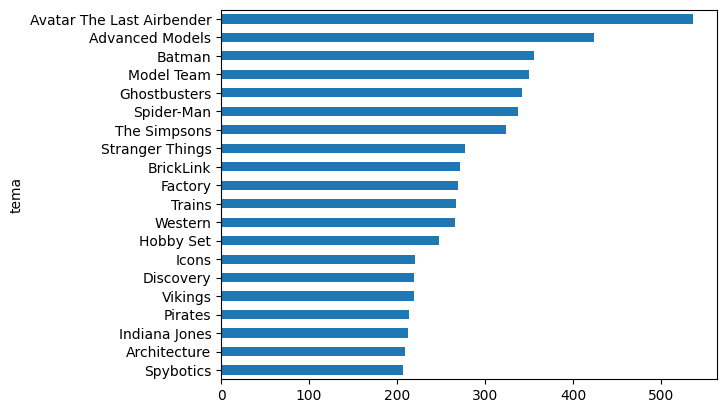

In [16]:
seti_z_vrednostmi.groupby("tema").vrednost.mean().sort_values().tail(20).plot.barh()

Najdražje teme po povprečni vrednosti setov.

## Cena Lego Minifigur

Ali se pri minifigurah pojavljajo enaki vzorci?

<AxesSubplot: xlabel='leto'>

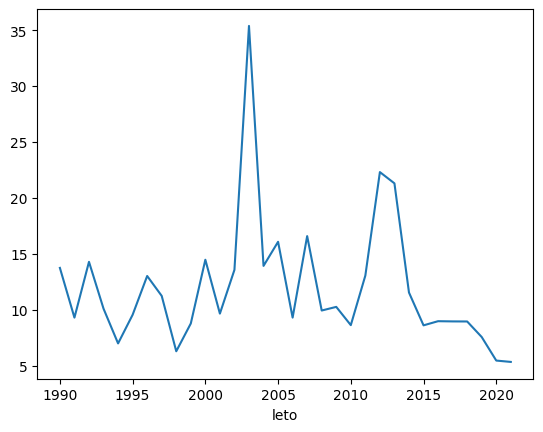

In [17]:
minifigure_nove = minifigure[(minifigure.novo > 0)]
minifigure_nove.groupby("leto").novo.mean().plot()

Cena minifigur v novem stanju je zelo stabilna z izjemo leta 2003.

<AxesSubplot: ylabel='ime'>

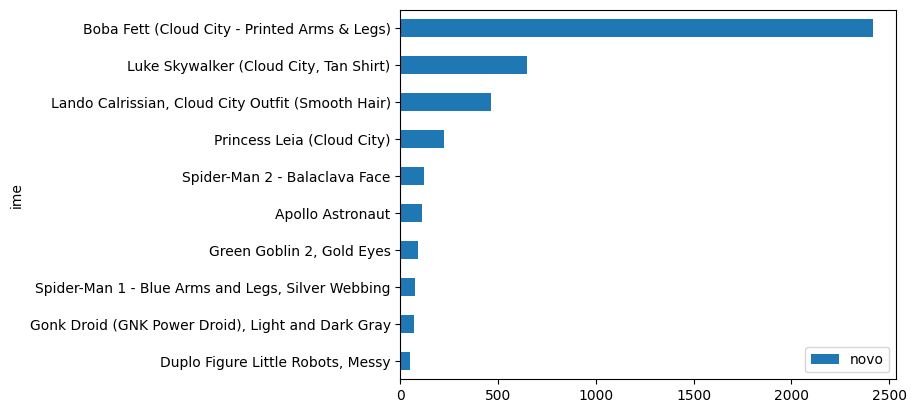

In [18]:
minifigure_nove[minifigure_nove.leto == 2003].sort_values("novo").tail(10).plot.barh(x="ime", y="novo")

Povprečje leta 2003 očitno dvigujejo nekatere minifigure iz teme Star Wars, ki jim je cena močno narasla.

<AxesSubplot: ylabel='ime'>

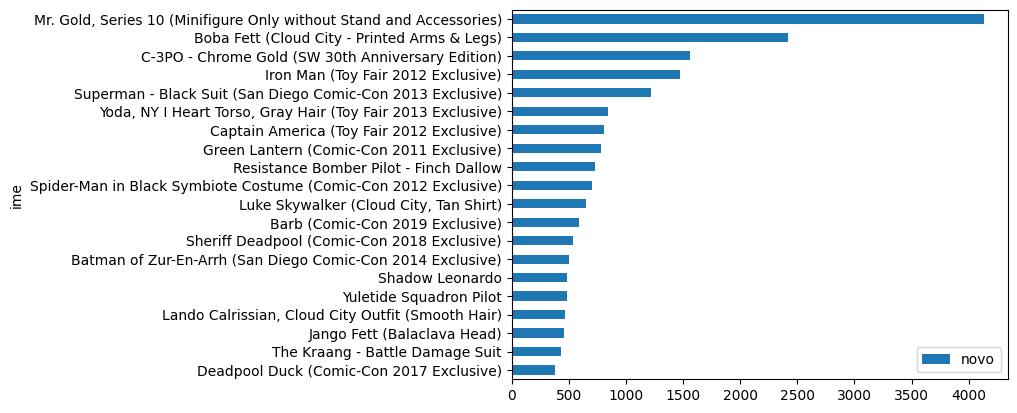

In [19]:
minifigure_nove.sort_values("novo").tail(20).plot.barh(x="ime", y="novo")

Seznam najdražjih minifigur v novem stanju. Opazimo, da prvih 5 minifigur po vrednosti preseže celo najdražje sete. Izstopa Mr. Gold pri 4133€.

<AxesSubplot: ylabel='ime'>

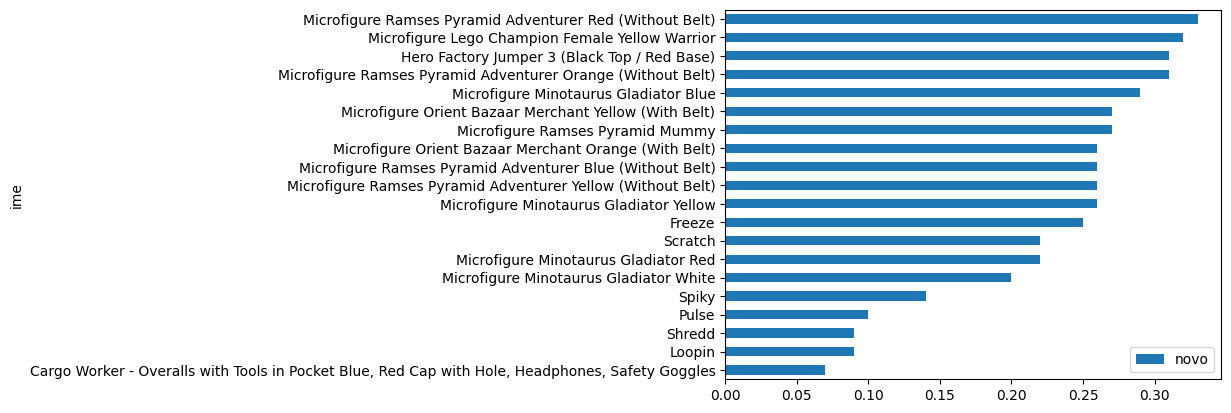

In [20]:
minifigure_nove.sort_values("novo").head(20).plot.barh(x="ime", y="novo")

Najcenejše minifigure so vredne le nekaj centov.

<AxesSubplot: xlabel='leto'>

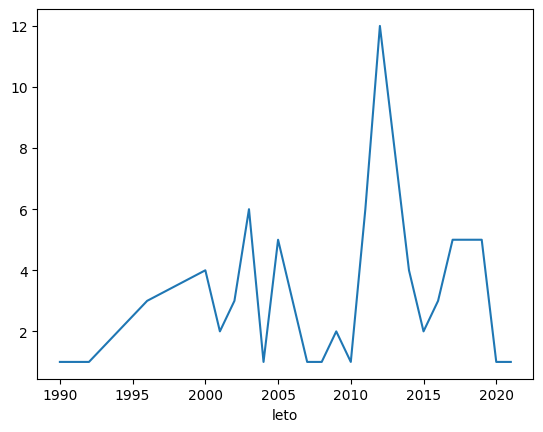

In [21]:
najdrazje_minifigure = minifigure_nove[minifigure_nove.novo > 100]
najdrazje_minifigure.groupby("leto").size().plot(x="leto")

Vidimo, da je skozi leta število minifigur, ki jim vrednost preseže 100€, popolnoma nepredvidljivo. Pričakovano glede na graf povprečnih cen je največ takih minifigur bilo v letih 2003, 2012 in 2013.

<AxesSubplot: xlabel='leto'>

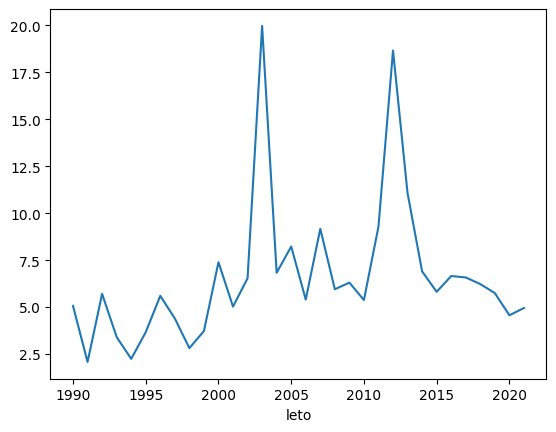

In [22]:
minifigure_rabljene = minifigure[minifigure.rabljeno > 0]
minifigure_rabljene.groupby("leto").rabljeno.mean().plot()

Za rabljene minifigure vidimo podoben vzorec kot pri novih, le da so cene ustrezno nižje.

## Ekskluzivnost minifigur

Zanima nas, ali se skozi čas povečuje število minifigur, ustvarjenih samo za en set.

<AxesSubplot: xlabel='leto'>

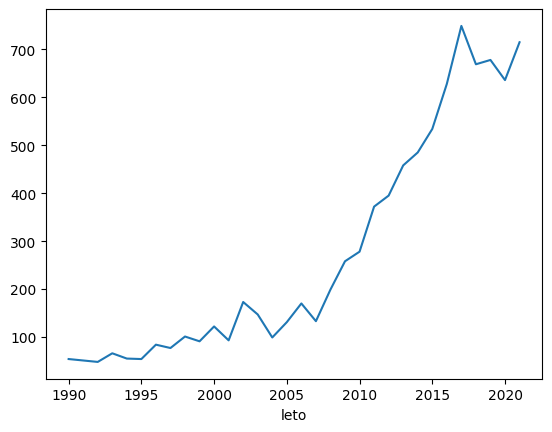

In [23]:
ekskluzivne_minifigure = minifigure[minifigure.st_setov == 1]
ekskluzivne_minifigure.groupby("leto").size().plot()

Število ekskluzivnih minifigur skozi leta narašča. Toda tudi število minifigur skozi leta narašča. Graf bo potrebno prilagoditi relativno na skupno število minifigur v letu.

<AxesSubplot: xlabel='leto'>

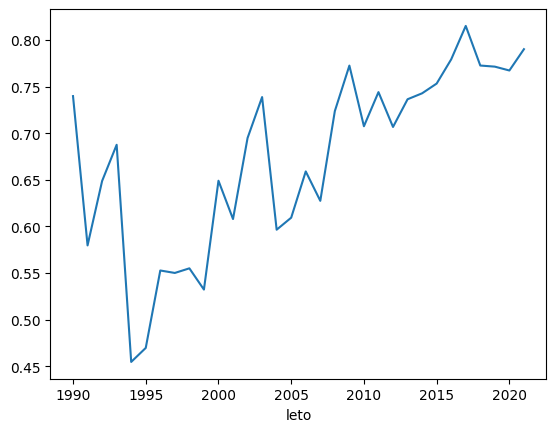

In [24]:
(minifigure[minifigure.st_setov == 1].groupby("leto").size() / minifigure.groupby("leto").size()).plot()

Med leti 1994 in 2021 lahko opazimo rast v deležu ekskluzivnih minifigur. Res pa je, da je ta delež že od 1996 in pred 1993 čez 50 %.

<AxesSubplot: xlabel='leto'>

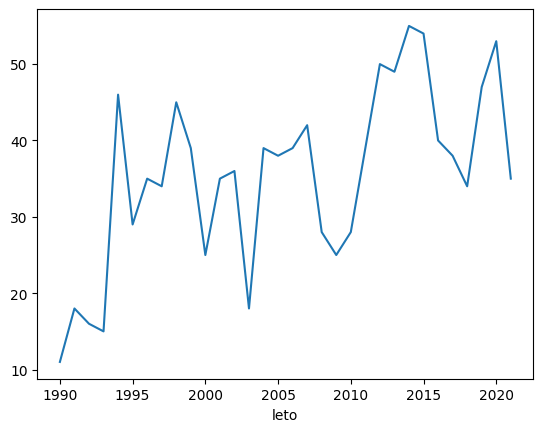

In [25]:
pogoste_minifigure = minifigure[minifigure.st_setov > 2]
pogoste_minifigure.groupby("leto").size().plot()

Pričakovano se število minifigur, ki se pojavijo v več setih, ne spreminja bistveno, zato se tudi delež le-teh manjša.

<AxesSubplot: ylabel='ime'>

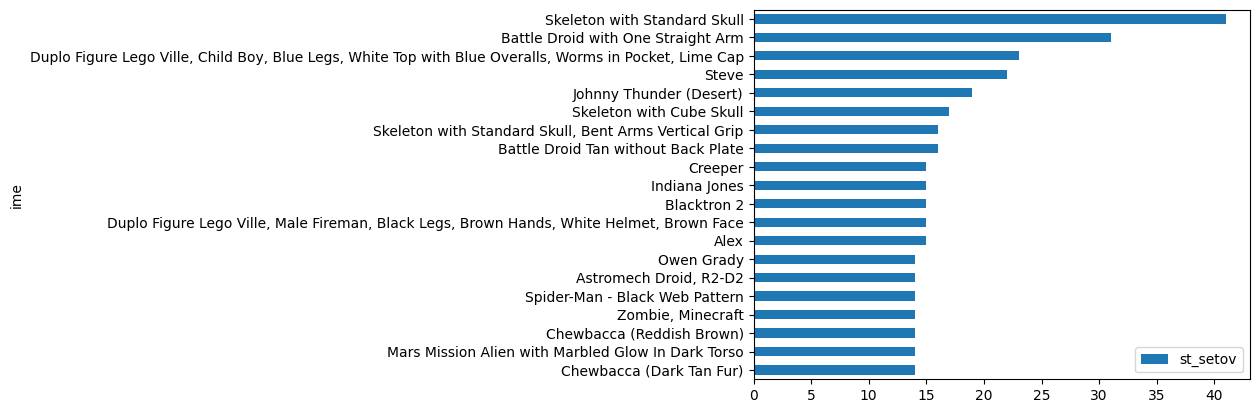

In [26]:
pogoste_minifigure.sort_values("st_setov").tail(20).plot.barh(x="ime", y="st_setov")

Seznam najbolj pogostih minifigur. Nekatere so značilne za svojo temo, druge pa so liki, ki nastopajo v večilih količinah (npr. Droidi iz Vojne zvezd).

## Napovedovanje teme iz opisa minifigure

Lego figure pogosto nimajo uradnega imena, imena v podatkih pa so iz baze podatkov, ki je namenjena lažjemu iskanju. Torej pričakujemo, da bo mogoče napovedati temo iz opisa minifigurice. Za napovedovanje bom uporabil Bayesov klasifikator s predavanj.

In [27]:
pojavitve_tem = seti.groupby("tema").size()
verjetnosti_tem = pojavitve_tem / len(seti)

In [28]:
def koren_besede(beseda):
    beseda = ''.join(znak for znak in beseda if znak.isalpha())
    if not beseda:
        return '$'
    beseda = beseda.rstrip(',')
    if not beseda:
        return '@'
    return beseda

def besede (niz) :
    return pd.Series(sorted({
        koren_besede(beseda) for beseda in niz.replace('-', ' ').lower().split() if beseda
    }))

Prednost imen iz baze podatkov je, da so besede večinoma že v svojih osnovnih oblikah.

In [29]:
ime = "Lord Sam Sinister - Suit with 3 Buttons Black - Black Legs, Top Hat"
besede(ime)

0            $
1        black
2      buttons
3          hat
4         legs
5         lord
6          sam
7     sinister
8         suit
9          top
10        with
dtype: object

In [30]:
tabela_z_razbitimi_imeni = minifigure.ime.apply(besede)
besede_iz_imen = (
    tabela_z_razbitimi_imeni.unstack(       # vnose v razpredelnici razpotegnemo v eno vrsto (z gnezdenim indeksom)
    ).reset_index(                          # podatke iz indeksa pretvorimo v razpredelnico
    )[
        ['id', 0]                           # izberemo le relevantna dva stolpca
    ].rename(
        {0: "beseda"},                      # stolpcema damo smiselni imeni 
        axis=1                              # s tem povemo, da preimenujemo stolpce in ne vrstic
    ).dropna(                               # odstranimo manjkajoče vnose
    )
)
besede_iz_imen

,id,beseda
0,1463,boots
1,2327pb01,$
2,2327pb03,$
3,2327pb04,$
4,2327pb05,$
...,...,...
274632,sc075,with
278656,47205pb039a,yellow
278775,47394pb080,with
278818,47394pb137,with


In [31]:
besede_tem = pd.merge(besede_iz_imen, minifigure[["tema"]], left_on="id", right_on="id")
besede_tem

,id,beseda,tema
0,1463,boots,DUPLO
1,1463,dora,DUPLO
2,1463,duplo,DUPLO
3,1463,explorer,DUPLO
4,1463,figure,DUPLO
...,...,...,...
93602,zip046,legs,Town
93603,zip046,male,Town
93604,zip046,white,Town
93605,zip046,with,Town


In [32]:
stolpec_verjetnosti_besed_po_temah = besede_tem.groupby(["tema","beseda"]).size() / pojavitve_tem
verjetnosti_besed_po_temah = stolpec_verjetnosti_besed_po_temah.unstack().transpose().fillna(1 / len(minifigure))
verjetnosti_besed_po_temah

tema,Adventurers,Agents,Alpha Team,Aquazone,Atlantis,Avatar The Last Airbender,BIONICLE,Batman I,Belville,BrickLink Designer Program,...,Toy Story,Train,Trolls World Tour,Ultra Agents,Unikitty!,Universe,Vidiyo,Vikings,Western,World Racers
beseda,,,,,,,,,,,,,,,,,,,,,
$,0.014085,0.000083,0.000083,1.178571,0.708333,0.000083,0.000083,0.000083,0.060976,0.000083,...,0.047619,0.000083,0.111111,0.000083,0.521739,0.000083,0.615385,0.000083,0.300000,2.888889
a,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,...,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.714286,0.000083,0.000083
aang,0.000083,0.000083,0.000083,0.000083,0.000083,0.500000,0.000083,0.000083,0.000083,0.000083,...,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083
aaron,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,...,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083
aat,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,...,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
çaroule,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,...,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083
çarouls,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,...,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083
éclair,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,...,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083,0.000083


In [33]:
def tema(ime):
    besede_imena = besede(ime)
    r = verjetnosti_besed_po_temah.reset_index()
    verjetnosti = r[r.beseda.isin(besede_imena)].product(numeric_only=True) * verjetnosti_tem
    return verjetnosti.sort_values(ascending=False).head()

tema("Lord Sam Sinister - Suit with 3 Buttons Black - Black Legs, Top Hat")

tema
Town            7.136932e-14
Adventurers     3.071398e-18
Harry Potter    3.037476e-18
Castle          1.405875e-25
Spider-Man      1.077506e-25
dtype: float64

Pravilni odgovor je drugi v tabeli.

In [34]:
tema("Agent Chase - Dual Sided Head")

tema
Agents        1.400252e-05
Star Wars     1.084581e-12
Dimensions    2.660987e-13
Town          6.171537e-14
Castle        2.120572e-14
dtype: float64

Ime je dovolj nazorno, da program z veliko gotovostjo pravilno ugotovi pravilno temo.

In [35]:
tema("Batman, Light Bluish Gray Suit with Black Mask")

tema
Town            9.722377e-08
Harry Potter    1.667854e-13
Spider-Man      1.607866e-14
Star Wars       8.139614e-17
Dimensions      1.777101e-17
dtype: float64

Po imenu bi sklepali, da pri ugotavljanju teme ne bo težav. A vendar je edina od tem v seznamu, v katerih se Batman pojavi, Dimensions.

In [36]:
tema("Darth Vader (Light Gray Head)")

tema
Star Wars       3.042565e-07
Town            4.559874e-12
Harry Potter    1.726940e-12
Castle          3.435326e-13
Games           1.924417e-13
dtype: float64

Še en lahek primer.

In [37]:
tema("Construction Worker - Orange Zipper, Safety Stripes, Orange Arms, Orange Legs, Red Construction Helmet, Gray Angular Beard")

tema
Town         3.168865e-06
Castle       4.315819e-28
Star Wars    5.348339e-31
Pirates      7.199198e-33
Sports       3.716528e-33
dtype: float64

In [38]:
tema("Team X-treme Daredevil 1 (REX-treme) - Dirtbike Helmet")

tema
World Racers    6.844008e-04
Town            7.550790e-18
Star Wars       8.016074e-24
Sports          3.049887e-25
Castle          8.939430e-26
dtype: float64

Pri daljših imenih je ugibanje boljše. Temo program zadane z veliko gotovostjo.

Napovedovanje teme ni popolnoma trivialno, čeprav so imena idealna za to nalogo. Algoritem je boljši pri daljših imenih, ali imenih, ki se pojavijo le v redkih temah.

## Seti z največ ekskluzivnimi minifigurami

Poskušamo ugotoviti, kateri seti imajo največ ekskluzivnih minifigur. Za minifigure imamo podatke za do 6 številk setov, v katerih se pojavijo. Za tiste minifigure, ki se pojavijo v več kot 6 setih teh številk nimamo, zato ne moremo iskati setov, ki imajo največ pogostih minifigur (minifigur v več kot npr. 3 setih).

<AxesSubplot: xlabel='stevilka_z_imenom'>

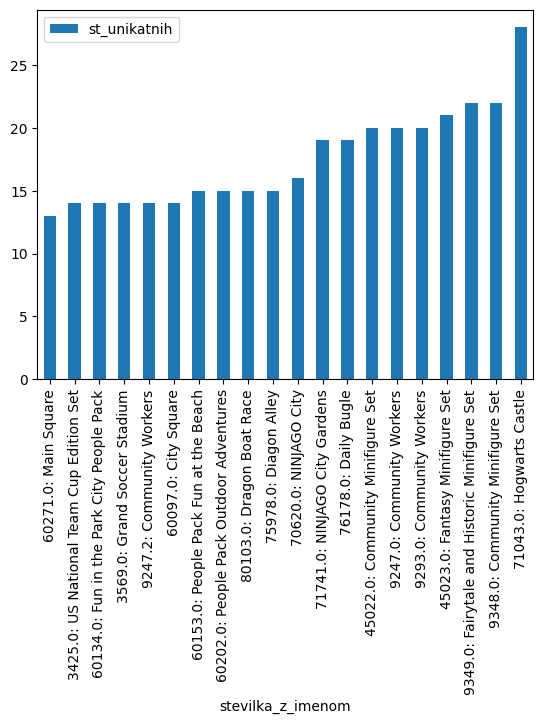

In [39]:
minifigure_seti = pd.merge(minifigure[minifigure.st_setov == 1], minifigure_v_setih, left_on="id", right_on="id")
unikatne_minifigure = pd.merge(seti, minifigure_seti, left_on="stevilka", right_on="set").groupby("set").size().reset_index().rename({0 : "st_unikatnih"}, axis=1)
najvec_unikatnih = pd.merge(seti, unikatne_minifigure, left_on="stevilka", right_on="set").sort_values("st_unikatnih").tail(20)
najvec_unikatnih["stevilka_z_imenom"] = najvec_unikatnih["set"].astype(str) + ": " + najvec_unikatnih["ime"]
najvec_unikatnih.plot.bar(x="stevilka_z_imenom", y="st_unikatnih")

## Ugotovitve

- Ali povprečno število kock v setih skozi leta narašča? Kaj pa minifigur? 
    
    Da, število kock narašča, število minifigur pa je v zadnjih letih po strmi rasti stagniralo.
- Ali cena Lego kock skozi leta narašča? 
    
    Prodajna cena setov je razmeroma stabilna.
- Kako starost vpliva na vrednost seta? 
    
    Stareši seti imajo danes višjo vrednost kot novejši. Izjema je nekaj let na začetku 21. stoletja.
- Ali se skozi leta pojavlja več ekskluzivnih minifigur? To definiramo kot minifigure, ki se pojavijo samo v enem setu.
    
    Število ekskluzivnih minifigur se povečuje. Že več časa pa te predstavljajo večino minifigur v setih.
- Ali lahko iz opisa minifigure sklepamo iz katere teme prihaja?
    
    Da, v mnogo primerih je mogoče temo napovedati iz imena minifigure. K temu pripomorejo sugestivna imena iz baze podatkov.